In [73]:
# only for test
from IPython import get_ipython
get_ipython().magic('reset -sf')  # clear cashes

import csv
import glob, os
import pandas as pd


print('aa')
print(os.path.abspath('.'))




aa
c:\Users\mynam\Documents\GitHub\Video-Player-Controlled-by-Action-Recognition_wkr\src


In [74]:
# initialisation
# TODO: move all packages here but not for now

# featureDict = {'down': {} , 'up': {}, 'left': {}, 'right': {}, 'fist': {}}
featureDict = {'d': {} , 'u': {}, 'l': {}, 'r': {}, 'f': {}}

In [75]:
# csv reader (faster)

import csv
import glob, os
import pandas as pd

emg_1_csv={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}
emg_2_csv={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}
emg_3_csv={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}
actionList = ['d', 'u', 'l', 'r', 'f']


folderPath_hyq = os.path.abspath('./Dataset/new/hyqData/')
folderPath_zjh = os.path.abspath('./Dataset/new/zjhData/')
folderPath_sgf = os.path.abspath('./Dataset/new/sgfData/')

filePath = glob.glob(os.path.join(folderPath_hyq, "*.csv"))
print(filePath)
csvData={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}
dl=[]
for f in filePath:
    csvData[f[-5]] = pd.read_csv(f, header=None).values.tolist()
    print(f[-5])

print(len(csvData['d']))

for currentAction in actionList:
    print(currentAction)
    for row in range(len(csvData[currentAction])):
        emg_1_csv[currentAction].append(csvData[currentAction][row][0])
        emg_2_csv[currentAction].append(csvData[currentAction][row][1])
        emg_3_csv[currentAction].append(csvData[currentAction][row][2])


csvData={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}
filePath = glob.glob(os.path.join(folderPath_zjh, "*.csv"))
print(filePath)
csvData={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}


dl=[]
for f in filePath:
    csvData[f[-5]] = pd.read_csv(f, header=None).values.tolist()
    print(f[-5])

print(len(csvData['d']))

for currentAction in actionList:
    print(currentAction)
    for row in range(len(csvData[currentAction])):
        emg_1_csv[currentAction].append(csvData[currentAction][row][0])
        emg_2_csv[currentAction].append(csvData[currentAction][row][1])
        emg_3_csv[currentAction].append(csvData[currentAction][row][2])


csvData={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}
filePath = glob.glob(os.path.join(folderPath_sgf, "*.csv"))
print(filePath)
csvData={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}

dl=[]
for f in filePath:
    csvData[f[-5]] = pd.read_csv(f, header=None).values.tolist()
    print(f[-5])

print(len(csvData['d']))


# load from csv to emg_1, emg_2, emg_3


for currentAction in actionList:
    print(currentAction)
    for row in range(len(csvData[currentAction])):
        emg_1_csv[currentAction].append(csvData[currentAction][row][0])
        emg_2_csv[currentAction].append(csvData[currentAction][row][1])
        emg_3_csv[currentAction].append(csvData[currentAction][row][2])

print(len(emg_1_csv['d']))
print(emg_1_csv['d'][0])
print(emg_2_csv['d'][0])
print(emg_3_csv['d'][0])
# emg_1_csv['d'] = f


# for csvFileIndex in range(len(dl)):
#     print(csvFileIndex)
#     for currentCSV in range(len(dl[csvFileIndex].values.tolist())): # access every recorded sample
#         print(currentCSV, end=' ')
#         emg_1_csv[currentAction[csvFileIndex]].append(dl[csvFileIndex].values.tolist()[currentCSV][0])
#         emg_2_csv[currentAction[csvFileIndex]].append(dl[csvFileIndex].values.tolist()[currentCSV][1])
#         emg_3_csv[currentAction[csvFileIndex]].append(dl[csvFileIndex].values.tolist()[currentCSV][2])

['c:\\Users\\mynam\\Documents\\GitHub\\Video-Player-Controlled-by-Action-Recognition_wkr\\src\\Dataset\\new\\hyqData\\d.csv', 'c:\\Users\\mynam\\Documents\\GitHub\\Video-Player-Controlled-by-Action-Recognition_wkr\\src\\Dataset\\new\\hyqData\\f.csv', 'c:\\Users\\mynam\\Documents\\GitHub\\Video-Player-Controlled-by-Action-Recognition_wkr\\src\\Dataset\\new\\hyqData\\l.csv', 'c:\\Users\\mynam\\Documents\\GitHub\\Video-Player-Controlled-by-Action-Recognition_wkr\\src\\Dataset\\new\\hyqData\\r.csv', 'c:\\Users\\mynam\\Documents\\GitHub\\Video-Player-Controlled-by-Action-Recognition_wkr\\src\\Dataset\\new\\hyqData\\u.csv']
d
f
l
r
u
16500
d
u
l
r
f
['c:\\Users\\mynam\\Documents\\GitHub\\Video-Player-Controlled-by-Action-Recognition_wkr\\src\\Dataset\\new\\zjhData\\d.csv', 'c:\\Users\\mynam\\Documents\\GitHub\\Video-Player-Controlled-by-Action-Recognition_wkr\\src\\Dataset\\new\\zjhData\\f.csv', 'c:\\Users\\mynam\\Documents\\GitHub\\Video-Player-Controlled-by-Action-Recognition_wkr\\src\\Dat

In [76]:
# import csv
# import glob, os
# import pandas as pd

# folderPath = os.path.abspath('./Dataset/new/hyqData/')
# filePath = glob.glob(os.path.join(folderPath, "*.csv"))

# csvData={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}
# emg_1_csv={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}
# emg_2_csv={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}
# emg_3_csv={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}


# currentAction=[]
# dl=[]
# for f in filePath:
#     dl.append(pd.read_csv(f, header=None))
#     currentAction.append(f[-5])

# for csvFileIndex in range(len(dl)):
#     print(csvFileIndex)
#     for currentCSV in range(len(dl[csvFileIndex].values.tolist())): # access every recorded sample
#         print(currentCSV, end=' ')
#         emg_1_csv[currentAction[csvFileIndex]].append(dl[csvFileIndex].values.tolist()[currentCSV][0])
#         emg_2_csv[currentAction[csvFileIndex]].append(dl[csvFileIndex].values.tolist()[currentCSV][1])
#         emg_3_csv[currentAction[csvFileIndex]].append(dl[csvFileIndex].values.tolist()[currentCSV][2])


Loading: d
Loading: u
Loading: l
Loading: r
Loading: f


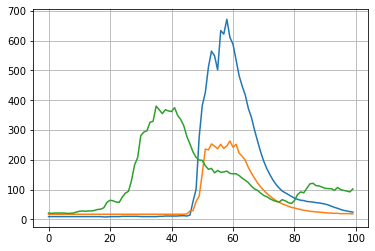

541
496
516
519
443
541
496


In [77]:
import matplotlib.pyplot as plt

record_length=300
window_length=100
window_1=50
window_2=40
window_3=30

emg_1_window={'d': {} , 'u': {}, 'l': {}, 'r': {}, 'f': {}}
emg_2_window={'d': {} , 'u': {}, 'l': {}, 'r': {}, 'f': {}}
emg_3_window={'d': {} , 'u': {}, 'l': {}, 'r': {}, 'f': {}}

step=300

for actionIndex in range(len(actionList)):
    print('Loading: '+actionList[actionIndex])
  
    emg_1_slice = [emg_1_csv[actionList[actionIndex]][i:i+step] for i in range(0,len(emg_1_csv[actionList[actionIndex]]),step)]
    emg_2_slice = [emg_2_csv[actionList[actionIndex]][i:i+step] for i in range(0,len(emg_1_csv[actionList[actionIndex]]),step)]
    emg_3_slice = [emg_3_csv[actionList[actionIndex]][i:i+step] for i in range(0,len(emg_1_csv[actionList[actionIndex]]),step)]

    

    generatedIndex=0
    for i in range(len(emg_1_slice)):
        max_1 = emg_1_slice[i].index(max(emg_1_slice[i]))
        max_2 = emg_2_slice[i].index(max(emg_2_slice[i]))
        max_3 = emg_3_slice[i].index(max(emg_3_slice[i]))
        avgMax=int((max_1+max_2+max_3)/3)
        
        if max_1>window_1 and max_1<record_length-window_1 and max_2>window_1 and max_2<record_length-window_1 and max_3>window_1 and max_3<record_length-window_1:
            
            emg_1_window[actionList[actionIndex]][generatedIndex] = emg_1_slice[i][avgMax-window_1:avgMax+(window_length-window_1)]
            emg_2_window[actionList[actionIndex]][generatedIndex] = emg_2_slice[i][avgMax-window_1:avgMax+(window_length-window_1)]
            emg_3_window[actionList[actionIndex]][generatedIndex] = emg_3_slice[i][avgMax-window_1:avgMax+(window_length-window_1)]
            generatedIndex+=1
        if max_1>window_2 and max_1<record_length-window_2 and max_2>window_2 and max_2<record_length-window_2 and max_3>window_2 and max_3<record_length-window_2:
            emg_1_window[actionList[actionIndex]][generatedIndex] = emg_1_slice[i][avgMax-window_2:avgMax+(window_length-window_2)]
            emg_2_window[actionList[actionIndex]][generatedIndex] = emg_2_slice[i][avgMax-window_2:avgMax+(window_length-window_2)]
            emg_3_window[actionList[actionIndex]][generatedIndex] = emg_3_slice[i][avgMax-window_2:avgMax+(window_length-window_2)]
            generatedIndex+=1
        if max_1>window_3 and max_1<record_length-window_3 and max_2>window_3 and max_2<record_length-window_3 and max_3>window_3 and max_3<record_length-window_3:
            emg_1_window[actionList[actionIndex]][generatedIndex] = emg_1_slice[i][avgMax-window_3:avgMax+(window_length-window_3)]
            emg_2_window[actionList[actionIndex]][generatedIndex] = emg_2_slice[i][avgMax-window_3:avgMax+(window_length-window_3)]
            emg_3_window[actionList[actionIndex]][generatedIndex] = emg_3_slice[i][avgMax-window_3:avgMax+(window_length-window_3)]
            generatedIndex+=1

            
plt.plot(emg_1_window['d'][0])
plt.plot(emg_2_window['d'][0])
plt.plot(emg_3_window['d'][0])
# plt.legend(['1', '2', '3'])
plt.grid()
plt.show()



print(len(emg_1_window['d']))
print(len(emg_1_window['u']))
print(len(emg_1_window['r']))
print(len(emg_1_window['l']))
print(len(emg_1_window['f']))
print(len(emg_3_window['d']))
print(len(emg_3_window['u']))

In [78]:
import math
import numpy as np
import csv
import glob, os
import pandas as pd
from scipy import signal
from scipy.fft import fft, ifft, fftfreq
import matplotlib.pyplot as plt


featureList = []

fs = 100 # sample frequency
T = 1/fs # sample rate


for actionIndex in range(len(actionList)):
    emg_1=[]
    emg_2=[]
    emg_3=[]
    
    for row in range(len(emg_1_window[actionList[actionIndex]])):
        emg_1=emg_1_window[actionList[actionIndex]][row]
        emg_2=emg_2_window[actionList[actionIndex]][row]
        emg_3=emg_3_window[actionList[actionIndex]][row]
        
        ### calculate time-domain features for every csv file

        # Mean Absolute Value
        mav_emg_1 = 0
        mav_emg_2 = 0
        mav_emg_3 = 0
        # Wavelength
        wl_emg_1 = 0
        wl_emg_2 = 0
        wl_emg_3 = 0
        # Slope Sign Changes
        sscThreshold = 0 # TODO: detemine the threshold
        ssc_emg_1 = 0
        ssc_emg_2 = 0
        ssc_emg_3 = 0
        # Zero Crossing: we don't have, do we?
        zc_emg_1 = 0
        zc_emg_2 = 0
        zc_emg_3 = 0
        # Root Mean Square
        rms_emg_1 = 0.0
        rms_emg_2 = 0.0
        rms_emg_3 = 0.0
        # frequency-domain features
        # Mean Frequency
        meanFreq_emg_1 = 0.0
        meanFreq_emg_2 = 0.0
        meanFreq_emg_3 = 0.0
        # Median Frequency
        medianFreq_emg_1 = 0.0
        medianFreq_emg_2 = 0.0
        medianFreq_emg_3 = 0.0
        # Mean Power
        meanPower_emg_1 = 0.0
        meanPower_emg_2 = 0.0
        meanPower_emg_3 = 0.0
        # Variance of Central Frequency
        vcf_emg_1 = 0.0
        vcf_emg_2 = 0.0
        vcf_emg_3 = 0.0

        # some temporary variables

        abs_sum_temp1=0
        abs_sum_temp2=0
        abs_sum_temp3=0
        ssc_temp1=0
        ssc_temp2=0
        ssc_temp3=0
        rms_temp1=0.0
        rms_temp2=0.0
        rms_temp3=0.0

        freqs_temp1, psd_temp1 = signal.welch(emg_1, fs)
        freqs_temp2, psd_temp2 = signal.welch(emg_2, fs)
        freqs_temp3, psd_temp3 = signal.welch(emg_3, fs)
        nominatorValue_temp1=0
        nominatorValue_temp2=0
        nominatorValue_temp3=0
        denominatorValue_temp1=0
        denominatorValue_temp2=0
        denominatorValue_temp3=0
        sm2_temp1=0
        sm2_temp2=0
        sm2_temp3=0

        i=0
        for i in range(len(emg_3)):
            abs_sum_temp1 = abs_sum_temp1 + abs(int(emg_1[i]))
            abs_sum_temp2 = abs_sum_temp2 + abs(int(emg_2[i]))
            abs_sum_temp3 = abs_sum_temp3 + abs(int(emg_3[i]))

            rms_temp1 = rms_temp1 + (int(emg_1[i]))**2
            rms_temp2 = rms_temp2 + (int(emg_2[i]))**2
            rms_temp3 = rms_temp3 + (int(emg_3[i]))**2

            if(i>0):
                wl_emg_1 = wl_emg_1 + abs(int(emg_1[i]) - int(emg_1[i-1]))
                wl_emg_2 = wl_emg_2 + abs(int(emg_2[i]) - int(emg_2[i-1]))
                wl_emg_3 = wl_emg_3 + abs(int(emg_3[i]) - int(emg_3[i-1]))
            if(i>1):
                ssc_temp1 = (int(emg_1[i-1]) - int(emg_1[i-2])) * (int(emg_1[i-1]) - int(emg_1[i]))
                ssc_temp2 = (int(emg_2[i-1]) - int(emg_2[i-2])) * (int(emg_2[i-1]) - int(emg_2[i]))
                ssc_temp3 = (int(emg_3[i-1]) - int(emg_3[i-2])) * (int(emg_3[i-1]) - int(emg_3[i]))
                if ssc_temp1 >= sscThreshold:
                    ssc_emg_1 = ssc_emg_1 + 1
                if ssc_temp2 >= sscThreshold:
                    ssc_emg_2 = ssc_emg_2 + 1
                if ssc_temp3 >= sscThreshold:
                    ssc_emg_3 = ssc_emg_3 + 1

            mav_emg_1 = abs_sum_temp1/len(emg_1)
            mav_emg_2 = abs_sum_temp2/len(emg_2)
            mav_emg_3 = abs_sum_temp3/len(emg_3)

            rms_emg_1 = math.sqrt(rms_temp1/len(emg_1))
            rms_emg_2 = math.sqrt(rms_temp2/len(emg_2))
            rms_emg_3 = math.sqrt(rms_temp3/len(emg_3))

        j=0
        for j in range(len(freqs_temp1)):
            nominatorValue_temp1 += freqs_temp1[j]*psd_temp1[j]
            nominatorValue_temp2 += freqs_temp2[j]*psd_temp2[j]
            nominatorValue_temp3 += freqs_temp3[j]*psd_temp3[j]
            denominatorValue_temp1 += psd_temp1[j]
            denominatorValue_temp2 += psd_temp2[j]
            denominatorValue_temp3 += psd_temp3[j]
            sm2_temp1 += np.square(freqs_temp1[j])*psd_temp1[j]
            sm2_temp2 += np.square(freqs_temp2[j])*psd_temp2[j]
            sm2_temp3 += np.square(freqs_temp3[j])*psd_temp3[j]

        meanFreq_emg_1 = nominatorValue_temp1/denominatorValue_temp1
        meanFreq_emg_2 = nominatorValue_temp2/denominatorValue_temp2
        meanFreq_emg_3 = nominatorValue_temp3/denominatorValue_temp3

        medianFreq_emg_1 = freqs_temp1[np.argsort(psd_temp1)[len(psd_temp1)//2]]
        medianFreq_emg_2 = freqs_temp2[np.argsort(psd_temp2)[len(psd_temp2)//2]]
        medianFreq_emg_3 = freqs_temp3[np.argsort(psd_temp3)[len(psd_temp3)//2]]

        meanPower_emg_1 = denominatorValue_temp1/len(freqs_temp1)
        meanPower_emg_2 = denominatorValue_temp2/len(freqs_temp2)
        meanPower_emg_3 = denominatorValue_temp3/len(freqs_temp3)

        vcf_emg_1 = sm2_temp1/denominatorValue_temp1 - np.square(nominatorValue_temp1/denominatorValue_temp1)
        vcf_emg_2 = sm2_temp2/denominatorValue_temp2 - np.square(nominatorValue_temp2/denominatorValue_temp2)
        vcf_emg_3 = sm2_temp3/denominatorValue_temp3 - np.square(nominatorValue_temp3/denominatorValue_temp3)
        
#         print('check')
#         featureDict[actionList[actionIndex]][row] = [mav_emg_1, mav_emg_2, mav_emg_3, 
#                                                             wl_emg_1, wl_emg_2, wl_emg_3, 
#                                                             ssc_emg_1, ssc_emg_2, ssc_emg_3, 
#                                                             rms_emg_1, rms_emg_2, rms_emg_3]
        featureDict[actionList[actionIndex]][row] = [mav_emg_1, mav_emg_2, mav_emg_3, 
                                                            wl_emg_1, wl_emg_2, wl_emg_3, 
                                                            ssc_emg_1, ssc_emg_2, ssc_emg_3, 
                                                            rms_emg_1, rms_emg_2, rms_emg_3, 
                                                            meanFreq_emg_1, meanFreq_emg_2, meanFreq_emg_3,
                                                            medianFreq_emg_1, medianFreq_emg_2, medianFreq_emg_3,
                                                            meanPower_emg_1, meanPower_emg_2, meanPower_emg_3,
                                                            vcf_emg_1, vcf_emg_2, vcf_emg_3]




print('Loading completed')

Loading completed


In [79]:
print(featureDict['l'])

2348672477, 133.05044156258933, 0.5392311144960311, 0.8565606748854722, 1.2628925814803296, 30.0, 21.0, 50.0, 2.4846884359165564, 95.97413612040154, 4.202935266844141, 1.2272737040030475, 0.5297935139112132, 3.234564941438226], 455: [87.38, 116.0, 129.07, 706, 235, 218, 56, 30, 50, 114.83257377591082, 119.28369544912665, 129.80620170084325, 1.6140463341322884, 2.636131706296173, 1.732186532262243, 46.0, 40.0, 29.0, 77.65704806022305, 3.326710410353602, 2.9217133550959606, 8.646568746815596, 8.684280873326626, 14.14891851464664], 456: [87.68, 125.61, 131.31, 667, 246, 230, 55, 31, 50, 114.89273258130821, 128.48902676882568, 132.0842534142507, 1.3912351693877154, 1.5659035153494925, 1.4278580301527988, 41.0, 22.0, 29.0, 56.30234120608486, 6.23183592560508, 3.984572684902911, 5.919675268857975, 4.542735612423918, 6.450352465896254], 457: [74.23, 130.71, 129.22, 520, 242, 230, 61, 22, 43, 102.9357566640475, 132.8009412617245, 130.12878236577794, 1.0470535412404243, 1.4363724420819657, 1.50

In [80]:
# # load data from csv files
# # feature extraction
# # TODO: freq-domain features 
# # TODO: feature selection
# # TODO: normalisation

# import math
# import numpy as np
# import csv
# import glob, os
# import pandas as pd
# from scipy import signal
# from scipy.fft import fft, ifft, fftfreq
# import matplotlib.pyplot as plt

# # locate folers
# actionList = ['down', 'up', 'left', 'right', 'fist']
# for currentAction in range(len(actionList)):
#     filePath1 = os.path.abspath('./Dataset/hyqData/' + actionList[currentAction])
#     filePath2 = os.path.abspath('./Dataset/zjhData/' + actionList[currentAction])
#     filePath3 = os.path.abspath('./Dataset/sgfData/' + actionList[currentAction])
# #     filePath4 = os.path.abspath('./Dataset/znData/' + actionList[currentAction])

#     print('Loading action: ' + actionList[currentAction])


#     file1 = glob.glob(os.path.join(filePath1, "*.csv"))
# #     file2 = glob.glob(os.path.join(filePath2, "*.csv"))
# #     file3 = glob.glob(os.path.join(filePath3, "*.csv"))
# #     file4 = glob.glob(os.path.join(filePath4, "*.csv"))


#     dl = []
#     for f in file1:
#         dl.append(pd.read_csv(f, header=None))
# #     for f in file2:
# #         dl.append(pd.read_csv(f, header=None))
# #     for f in file3:
# #         dl.append(pd.read_csv(f, header=None))
# #     for f in file4:
# #         dl.append(pd.read_csv(f, header=None))



#     # obtain each EMG channel data
    

#     featureList = []
    
#     fs = 100 # sample frequency
#     T = 1/fs # sample rate

#     csvFileIndex=0
#     currentCSV=0
#     for csvFileIndex in range(len(dl)): # access every csv file
#         emg_1=[]
#         emg_2=[]
#         emg_3=[]
#         for currentCSV in range(len(dl[csvFileIndex].values.tolist())): # access every recorded sample
#             emg_1.append(dl[csvFileIndex].values.tolist()[currentCSV][0])
#             emg_2.append(dl[csvFileIndex].values.tolist()[currentCSV][1])
#             emg_3.append(dl[csvFileIndex].values.tolist()[currentCSV][2])


#         ### calculate time-domain features for every csv file

#         # Mean Absolute Value
#         mav_emg_1 = 0
#         mav_emg_2 = 0
#         mav_emg_3 = 0
#         # Wavelength
#         wl_emg_1 = 0
#         wl_emg_2 = 0
#         wl_emg_3 = 0
#         # Slope Sign Changes
#         sscThreshold = 0 # TODO: detemine the threshold
#         ssc_emg_1 = 0
#         ssc_emg_2 = 0
#         ssc_emg_3 = 0
#         # Zero Crossing: we don't have, do we?
#         zc_emg_1 = 0
#         zc_emg_2 = 0
#         zc_emg_3 = 0
#         # Root Mean Square
#         rms_emg_1 = 0.0
#         rms_emg_2 = 0.0
#         rms_emg_3 = 0.0
#         # frequency-domain features
#         # Mean Frequency
#         meanFreq_emg_1 = 0.0
#         meanFreq_emg_2 = 0.0
#         meanFreq_emg_3 = 0.0
#         # Median Frequency
#         medianFreq_emg_1 = 0.0
#         medianFreq_emg_2 = 0.0
#         medianFreq_emg_3 = 0.0
#         # Mean Power
#         meanPower_emg_1 = 0.0
#         meanPower_emg_2 = 0.0
#         meanPower_emg_3 = 0.0
#         # Variance of Central Frequency
#         vcf_emg_1 = 0.0
#         vcf_emg_2 = 0.0
#         vcf_emg_3 = 0.0
        
#         # some temporary variables
        
#         abs_sum_temp1=0
#         abs_sum_temp2=0
#         abs_sum_temp3=0
#         ssc_temp1=0
#         ssc_temp2=0
#         ssc_temp3=0
#         rms_temp1=0.0
#         rms_temp2=0.0
#         rms_temp3=0.0
        
#         freqs_temp1, psd_temp1 = signal.welch(emg_1, fs)
#         freqs_temp2, psd_temp2 = signal.welch(emg_2, fs)
#         freqs_temp3, psd_temp3 = signal.welch(emg_3, fs)
#         nominatorValue_temp1=0
#         nominatorValue_temp2=0
#         nominatorValue_temp3=0
#         denominatorValue_temp1=0
#         denominatorValue_temp2=0
#         denominatorValue_temp3=0
#         sm2_temp1=0
#         sm2_temp2=0
#         sm2_temp3=0
        
#         i=0
#         for i in range(len(emg_3)):
#             abs_sum_temp1 = abs_sum_temp1 + abs(int(emg_1[i]))
#             abs_sum_temp2 = abs_sum_temp2 + abs(int(emg_2[i]))
#             abs_sum_temp3 = abs_sum_temp3 + abs(int(emg_3[i]))
            
#             rms_temp1 = rms_temp1 + (int(emg_1[i]))**2
#             rms_temp2 = rms_temp2 + (int(emg_2[i]))**2
#             rms_temp3 = rms_temp3 + (int(emg_3[i]))**2
            
#             if(i>0):
#                 wl_emg_1 = wl_emg_1 + abs(int(emg_1[i]) - int(emg_1[i-1]))
#                 wl_emg_2 = wl_emg_2 + abs(int(emg_2[i]) - int(emg_2[i-1]))
#                 wl_emg_3 = wl_emg_3 + abs(int(emg_3[i]) - int(emg_3[i-1]))
#             if(i>1):
#                 ssc_temp1 = (int(emg_1[i-1]) - int(emg_1[i-2])) * (int(emg_1[i-1]) - int(emg_1[i]))
#                 ssc_temp2 = (int(emg_2[i-1]) - int(emg_2[i-2])) * (int(emg_2[i-1]) - int(emg_2[i]))
#                 ssc_temp3 = (int(emg_3[i-1]) - int(emg_3[i-2])) * (int(emg_3[i-1]) - int(emg_3[i]))
#                 if ssc_temp1 >= sscThreshold:
#                     ssc_emg_1 = ssc_emg_1 + 1
#                 if ssc_temp2 >= sscThreshold:
#                     ssc_emg_2 = ssc_emg_2 + 1
#                 if ssc_temp3 >= sscThreshold:
#                     ssc_emg_3 = ssc_emg_3 + 1
            
#             mav_emg_1 = abs_sum_temp1/len(emg_1)
#             mav_emg_2 = abs_sum_temp2/len(emg_2)
#             mav_emg_3 = abs_sum_temp3/len(emg_3)

#             rms_emg_1 = math.sqrt(rms_temp1/len(emg_1))
#             rms_emg_2 = math.sqrt(rms_temp2/len(emg_2))
#             rms_emg_3 = math.sqrt(rms_temp3/len(emg_3))
            
#         j=0
#         for j in range(len(freqs_temp1)):
#             nominatorValue_temp1 += freqs_temp1[j]*psd_temp1[j]
#             nominatorValue_temp2 += freqs_temp2[j]*psd_temp2[j]
#             nominatorValue_temp3 += freqs_temp3[j]*psd_temp3[j]
#             denominatorValue_temp1 += psd_temp1[j]
#             denominatorValue_temp2 += psd_temp2[j]
#             denominatorValue_temp3 += psd_temp3[j]
#             sm2_temp1 += np.square(freqs_temp1[j])*psd_temp1[j]
#             sm2_temp2 += np.square(freqs_temp2[j])*psd_temp2[j]
#             sm2_temp3 += np.square(freqs_temp3[j])*psd_temp3[j]
            
#         meanFreq_emg_1 = nominatorValue_temp1/denominatorValue_temp1
#         meanFreq_emg_2 = nominatorValue_temp2/denominatorValue_temp2
#         meanFreq_emg_3 = nominatorValue_temp3/denominatorValue_temp3

#         medianFreq_emg_1 = freqs_temp1[np.argsort(psd_temp1)[len(psd_temp1)//2]]
#         medianFreq_emg_2 = freqs_temp2[np.argsort(psd_temp2)[len(psd_temp2)//2]]
#         medianFreq_emg_3 = freqs_temp3[np.argsort(psd_temp3)[len(psd_temp3)//2]]
        
#         meanPower_emg_1 = denominatorValue_temp1/len(freqs_temp1)
#         meanPower_emg_2 = denominatorValue_temp2/len(freqs_temp2)
#         meanPower_emg_3 = denominatorValue_temp3/len(freqs_temp3)
        
#         vcf_emg_1 = sm2_temp1/denominatorValue_temp1 - np.square(nominatorValue_temp1/denominatorValue_temp1)
#         vcf_emg_2 = sm2_temp2/denominatorValue_temp2 - np.square(nominatorValue_temp2/denominatorValue_temp2)
#         vcf_emg_3 = sm2_temp3/denominatorValue_temp3 - np.square(nominatorValue_temp3/denominatorValue_temp3)
            
#         featureDict[actionList[currentAction]][csvFileIndex] = [mav_emg_1, mav_emg_2, mav_emg_3, 
#                                                                 wl_emg_1, wl_emg_2, wl_emg_3, 
#                                                                 ssc_emg_1, ssc_emg_2, ssc_emg_3, 
#                                                                 rms_emg_1, rms_emg_2, rms_emg_3, 
#                                                                 meanFreq_emg_1, meanFreq_emg_2, meanFreq_emg_3,
#                                                                 medianFreq_emg_1, medianFreq_emg_2, medianFreq_emg_3,
#                                                                 meanPower_emg_1, meanPower_emg_2, meanPower_emg_3,
#                                                                 vcf_emg_1, vcf_emg_2, vcf_emg_3]
        
# #         TODO: visualisation
# #         print(ssc_emg_1, ssc_emg_2, ssc_emg_3)
# #         print(mav_emg_1, mav_emg_2, mav_emg_3)
# #         print(wl_emg_1, wl_emg_2, wl_emg_3)
# #         print(rms_emg_1, rms_emg_2, rms_emg_3)
# #         print(round(meanFreq_emg_1,2), round(medianFreq_emg_1,2), round(meanPower_emg_1,2), round(vcf_emg_1,2))
# #         print('processing the next file')

# # normalisation
#     #featureDict




# print('Loading completed')



In [81]:
# # frequency-domain features
# from scipy import signal
# from scipy.fft import fft, ifft, fftfreq
# import matplotlib.pyplot as plt

# # os.path.abspath('./Dataset/hyqData')
# # dl = []
# # for f in file1:
# #     dl.append(pd.read_csv(f, header=None))
    
# # emg_1=[]
# # emg_2=[]
# # emg_3=[]

# # for row in range(len(dl[0])):
# #     emg_1.append(dl[0].values.tolist()[row][0])
# #     emg_2.append(dl[0].values.tolist()[row][1])
# #     emg_3.append(dl[0].values.tolist()[row][2])

# # mean frequency
# meanFreq = 0
# # variance of central frequency
# VCF=0
# # median frequency
# medianFreq = 0
# # mean power
# meanPower = 0



# T=1/100 # sample rate
# N=len(emg_2)
# freqDict={}
# yf=fft(emg_2)
# xf = fftfreq(N, T)[:N//2] #0.3344 per sample

# plt.plot(xf[:], 2.0/N * np.abs(yf[0:N//2][:]))
# plt.grid()
# plt.show()

# detrendSig = signal.detrend(emg_2)
# yf=fft(detrendSig)
# xf = fftfreq(N, T)[:N//2] #0.3344 per sample
# plt.plot(xf[:], 2.0/N * np.abs(yf[0:N//2][:]))
# plt.grid()
# plt.show()

# freqs, psd = signal.welch(signal.detrend(emg_3), 100)
# nominatorValue=0
# denominatorValue=0
# SM2=0
# for i in range(len(freqs)):
#     nominatorValue += freqs[i]*psd[i]
#     denominatorValue += psd[i]
#     SM2 += np.square(freqs[i])*psd[i] 
    
# meanFreq = nominatorValue/denominatorValue

# medianFreq = freqs[np.argsort(psd)[len(psd)//2]]

# meanPower = denominatorValue/len(freqs)


# VCF = SM2/denominatorValue - np.square(nominatorValue/denominatorValue)

# print(meanFreq)
# print(medianFreq)
# print(meanPower)
# print(VCF)


# # Pxx_den = np.reshape( Pxx_den, (1,-1) ) 
# # width = np.tile(f[1]-f[0], (1, Pxx_den.shape[1]))
# # f = np.reshape(f, (1, -1))
# # P = Pxx_den * width
# # pwr = np.sum(P)
# # mnfreq = np.dot(P, f.T)/pwr





In [82]:
# listtemp = (2.0/N * np.abs(yf[0:N//2][:]))
# print(xf[3]-xf[2]) #

# print(len(freqs))

In [83]:
# # TODO: feature selection
# # TODO: visualisation (if possible)

# print(featureDict.keys())
# print(len(featureDict['down']))
# print(len(featureDict['up']))
# print(len(featureDict['left']))
# print(len(featureDict['right']))
# print(len(featureDict['fist']))
# print(featureDict['down'][0])
# print(featureDict['up'][0])
# print(featureDict['left'][0])
# print(featureDict['right'][0])
# print(featureDict['fist'][0])


(1509, 24)
(1509, 5)
(503, 24)
(503, 5)
(503, 24)
(503, 5)
Epoch 1/100
31/31 [==============================] - 1s 45ms/step - loss: 1.5195 - accuracy: 0.5865 - val_loss: 1.6126 - val_accuracy: 0.3022
Epoch 2/100
31/31 [==============================] - 1s 29ms/step - loss: 0.7505 - accuracy: 0.7164 - val_loss: 1.2984 - val_accuracy: 0.4712
Epoch 3/100
31/31 [==============================] - 1s 29ms/step - loss: 0.6605 - accuracy: 0.7449 - val_loss: 1.1688 - val_accuracy: 0.6342
Epoch 4/100
31/31 [==============================] - 1s 30ms/step - loss: 0.6351 - accuracy: 0.7594 - val_loss: 1.1529 - val_accuracy: 0.6382
Epoch 5/100
31/31 [==============================] - 1s 30ms/step - loss: 0.5960 - accuracy: 0.7667 - val_loss: 1.0654 - val_accuracy: 0.5984
Epoch 6/100
31/31 [==============================] - 1s 29ms/step - loss: 0.5658 - accuracy: 0.7899 - val_loss: 1.0603 - val_accuracy: 0.5785
Epoch 7/100
31/31 [==============================] - 1s 30ms/step - loss: 0.5614 - accura

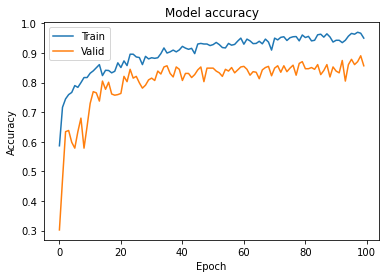

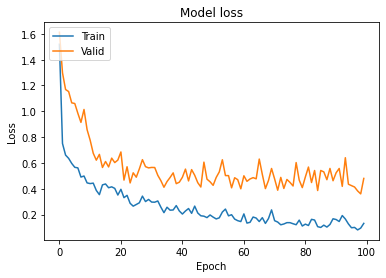

Test loss: 0.45761141180992126
Test accuracy: 0.8866799473762512


In [84]:
# create labels for data samples
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam, RMSprop
from keras.layers import Conv1D, BatchNormalization
from keras.utils import np_utils,normalize
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(1234)



x_val=[]
y_val=[]

def labelSwitch(arg):
    switcher = {
        'l': 1,
        'r': 2,
        'u': 3,
        'd': 4,
        'f': 0
    }
    return switcher[arg]

i=0
j=''
dictLength=0
current = ['d', 'u', 'l', 'r', 'f']
for j in range(len(current)):
    for i in range(len(featureDict[current[j]])):
        x_val.append(featureDict[current[j]][i])
        y_val.append(labelSwitch(current[j]))
        dictLength=dictLength+1

x_val_array = np.array(x_val)
y_val_array = np.array(y_val).reshape(dictLength,1)

x_val_array = normalize(x_val_array, axis = 1)

state = np.random.get_state()
np.random.shuffle(x_val_array)
np.random.set_state(state)
np.random.shuffle(y_val_array)


TRAIN_SPLIT = int(0.6*x_val_array.shape[0])
TEST_SPLIT = int(0.2*x_val_array.shape[0] + TRAIN_SPLIT)


x_train, x_test, x_validate = np.split(x_val_array, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_val_array, [TRAIN_SPLIT, TEST_SPLIT])



y_train_class = np_utils.to_categorical(y_train)
y_test_class = np_utils.to_categorical(y_test)
y_validate_class = np_utils.to_categorical(y_validate)


#  see dataset volume

print(x_train.shape)
print(y_train_class.shape)
print(x_validate.shape)
print(y_validate_class.shape)
print(x_test.shape)
print(y_test_class.shape)




# TODO: Model



model = Sequential()
# model.add(Conv1D(32, kernel_size = 3, activation='relu', kernel_initializer='he_normal', input_shape=x_train.shape[1:]))
# model.add(Flatten())
model.add(Dense(4000, activation='relu', kernel_initializer='he_normal', input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Dense(1000, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
# model.add(Dropout(0.1))
model.add(Dense(5, activation='softmax'))

# opt = RMSprop(lr=0.1, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history=model.fit(x_train, y_train_class, epochs=100, batch_size=50, validation_data=(x_validate, y_validate_class))

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

# Plot training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

score = model.evaluate(x_test, y_test_class, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])